# **Weather Forecasting Project - Part 2**

**Statistical Models for Data Science**

**Marco Colognesi - VR495478**

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
sns.set_theme()

## **Multiple Linear Regression**

The first forecasting model that will be tested is the **multiple linear regression**: a statistical method used to understand the **relationship** between **two or more** **independent variables** and a **single dependent variable**.

### **Multiple Linear Regression using `'humidity'`, `'wind_speed'`, `'meanpressure'`**

In [3]:
# Importing train dataset
train_data = pd.read_csv(
    filepath_or_buffer="cleaned_data/train_clean.csv",
    parse_dates=['date'],
    index_col=['date'],
)

# Imposing data frequency as daily
train_data = train_data.asfreq('D')

# Lowercase column names
train_data.columns = train_data.columns.str.lower()

display(train_data)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01,2013
...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,2016-12,2016
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12,2016
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12,2016


In [4]:
# Importing test data
test_data = pd.read_csv(
    filepath_or_buffer="cleaned_data/test_clean.csv",
    parse_dates=['date'],
    index_col=['date']
)

# Imposing frequency
test_data = test_data.asfreq('D')

# Lowercase column names
test_data.columns = test_data.columns.str.lower()

display(test_data)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,1018.277778,2017-01,2017
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017-01,2017
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017-01,2017
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017-01,2017
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017-01,2017
...,...,...,...,...,...,...
2017-03-27,29.500000,38.625000,13.650000,1009.500000,2017-03,2017
2017-03-28,29.888889,40.666667,8.844444,1009.000000,2017-03,2017
2017-03-29,31.000000,34.500000,13.200000,1007.125000,2017-03,2017


The first version of this implementation will use as **independent variables** (*predictors*), the variables already present in the source dataset: `"humidity"`, `"wind_speed"`, and `"meanpressure"`. The purpose is to predict the variable `"meantemp"`, which will be evaluated on both training and testing datasets.

                            OLS Regression Results                            
Dep. Variable:               meantemp   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3113.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:02:33   Log-Likelihood:                -3521.6
No. Observations:                1461   AIC:                             7051.
Df Residuals:                    1457   BIC:                             7072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          820.0381     10.416     78.728   

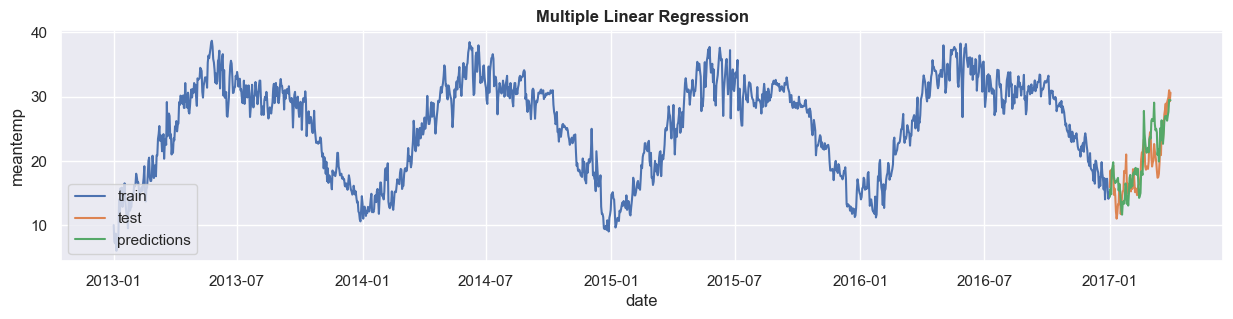

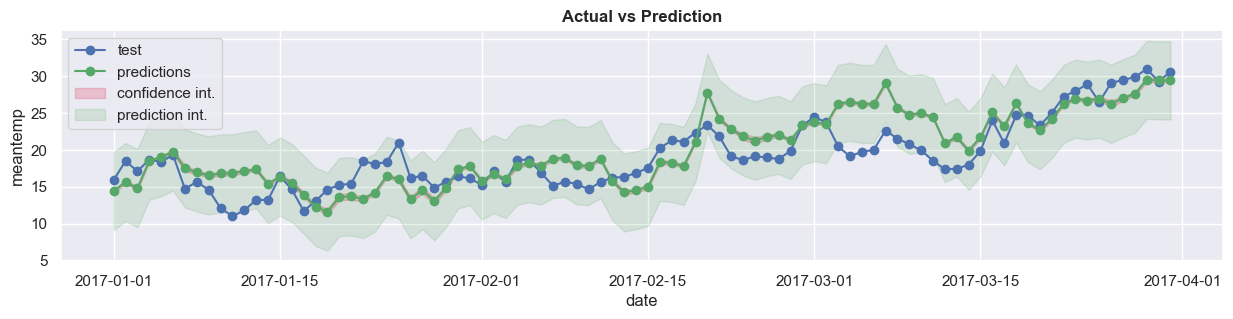

Evaluation on test set: 
R2: 0.59072716208202
RMSE: 8.8947529095909
MAE: 2.4309679154425345


In [5]:
# Multiple linear regression using "humidity", "wind_speed", "meanpressure"

# Training dataset
X_train = train_data[['humidity', 'wind_speed', 'meanpressure']]
y_train = train_data['meantemp']

# Testing dataset
X_test = test_data[['humidity', 'wind_speed', 'meanpressure']]
y_test = test_data['meantemp']

# Fitting the model
X_train = sm.add_constant(X_train)  # in statsmodels we need to manually add constant otherwise b=0
reg = sm.OLS(y_train, X_train).fit()

# Printing regression summary
print(reg.summary())

# Making predictions on test data
X_test = sm.add_constant(X_test)
df_predictions = reg.get_prediction(X_test).summary_frame(alpha=0.05)
preds = df_predictions['mean'].values

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Multiple Linear Regression", weight="bold")
plt.plot(train_data.index, y_train, label='train')
plt.plot(test_data.index, y_test, label='test')
plt.plot(test_data.index, preds, label='predictions')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='lower left')
plt.show()

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Actual vs Prediction", weight="bold")
plt.plot(test_data.index, y_test, 'o-' ,label='test')
plt.plot(test_data.index, preds, 'go-', label='predictions')
plt.fill_between(test_data.index, df_predictions.mean_ci_lower, df_predictions.mean_ci_upper, alpha=.2, color='crimson', label = 'confidence int.')
plt.fill_between(test_data.index, df_predictions.obs_ci_lower, df_predictions.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='best')
plt.show()

r2_test = r2_score(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=True)
mae = mean_absolute_error(y_test, preds)

print(f"=============================")
print(f"Evaluation on test set: \nR2: {r2_test}\nRMSE: {rmse}\nMAE: {mae}")

The result on the training model is not bad, as the **R2** presents a value of `0.865`, however, **several issues** can be observed that make the model unsuitable.

First of all, as suggested by the summary provided by statsmodels, a **strong multicollinearity problem** is present. This occurs when the predictors are highly correlated with each other, making it difficult to distinguish the individual effects of the variables on the target.

In addition, evaluating the model on the test dataset it is possible to observe a **collapse** of R2 to `0.59`, signal that the model is not very effective in making predictions.

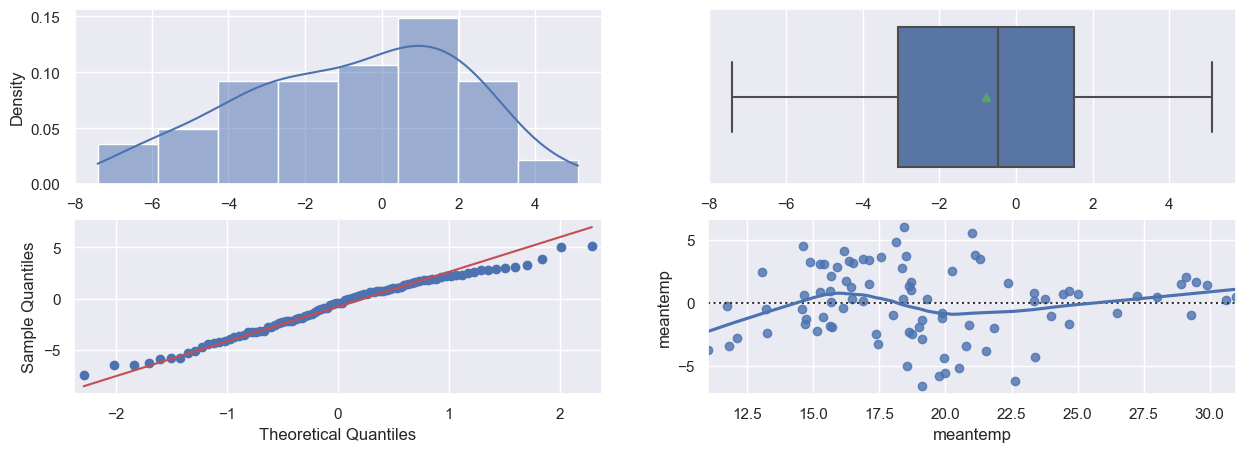

In [6]:
# Calculating residuals
residuals = y_test - preds

# plotting residuals visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
# histogram and boxplot to see distribution
sns.histplot(residuals, kde=True, stat='density', ax=ax[0,0])
sns.boxplot(x=residuals, ax=ax[0,1], showmeans=True)
# qq-plot 
sm.qqplot(residuals, line='q', ax=ax[1,0])
# residplot
sns.residplot(y=residuals, x=y_test, lowess=True, ax=ax[1,1])
plt.show()

Even when analyzing the residuals (difference between prediction and actual value) it is possible to see problems in the model:

* Their **distribution** shows discrepancies: the **histogram** does not reflect a typical "bell curve" but shows a strong presence of negative errors (**left-shifted curve**, presence of **skewness**), which is also reiterated by the **boxplot** (their distribution should be symmetrical, with the sides of the boxplot having approximately the same length).
* The **qq-plot** shows deviations from the diagonal line, suggesting, again, skewness in the distribution.
* The **residplot** doesn't reflect a strict horizontal trend.

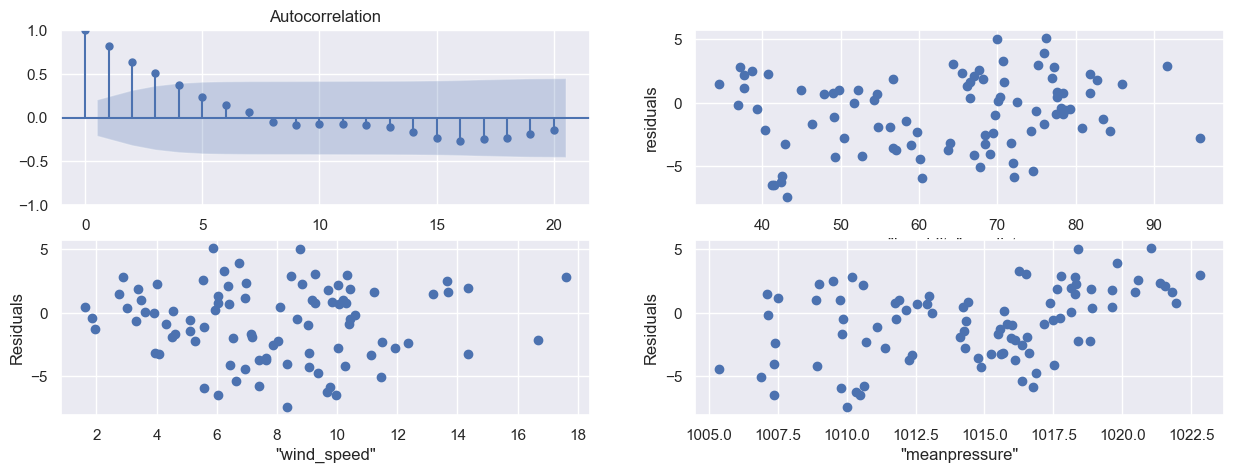

In [7]:
fig, ax = plt.subplots(2,2,figsize=(15,5))
plot_acf(residuals, ax=ax[0,0])

ax[0,1].scatter(test_data['humidity'],residuals)
ax[0,1].set_xlabel('"humidity" predictor')
ax[0,1].set_ylabel('residuals')

ax[1,0].scatter(test_data['wind_speed'],residuals)
ax[1,0].set_xlabel('"wind_speed"')
ax[1,0].set_ylabel('Residuals')

ax[1,1].scatter(test_data['meanpressure'],residuals)
ax[1,1].set_xlabel('"meanpressure"')
ax[1,1].set_ylabel('Residuals')
plt.show()

Even when analyzing the relationship between residuals and predictors, problems can be observed.

* **Autocorrelation** function shows that the residuals are not independent of each other, suggesting that the model fails to capture underlying dependencies or time series structures adequately.
* Residuals also show **relationships** with the **predictors**, rather than showing independence.

Let us see if by adding **date-related information** in the implementation the model shows improvement.

Specifically, a **one-hot encoding** on the months will be performed.
This means that our dataset will have a dummy variable for each month, whose value will be `True (1)` or `False (0)` depending on the date.

### **Multiple Linear Regression using One-Hot Encoding on 'Month' variable**

In [99]:
# Creating a dummy dataframe containing encoded variables on train data
dummy_df_train = pd.DataFrame(data=pd.get_dummies(train_data.index.month, drop_first=True, prefix='month'))
dummy_df_train.index = train_data.index

# Converting Booleans (True and False) to integers (1 and 0)
dummy_df_train = dummy_df_train.astype(int)

display(dummy_df_train)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,
2013-01-01,0,0,0,0,0,0,0,0,0,0,0
2013-01-02,0,0,0,0,0,0,0,0,0,0,0
2013-01-03,0,0,0,0,0,0,0,0,0,0,0
2013-01-04,0,0,0,0,0,0,0,0,0,0,0
2013-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0,0,0,0,0,0,0,0,0,0,1
2016-12-28,0,0,0,0,0,0,0,0,0,0,1
2016-12-29,0,0,0,0,0,0,0,0,0,0,1


In [100]:
# Creating dummy dataframe containing encoded variables on test data
dummy_df_test = pd.DataFrame(data=pd.get_dummies(test_data.index.month, drop_first=True, prefix='month'))
dummy_df_test.index = test_data.index

# Converting into int
dummy_df_test = dummy_df_test.astype(int)

# Adding to dummy_df_test missing columns from dummy_df_train (so that they can match)
missing_cols = list(set(dummy_df_train.columns) - set(dummy_df_test.columns))

# sorting missing months for better ordering
sorted_missing_cols = sorted(missing_cols, key=lambda x : int(x.split('_')[1]))

for month in sorted_missing_cols:
    dummy_df_test[month] = 0
    
display(dummy_df_test)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,
2017-01-01,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,0,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,1,0,0,0,0,0,0,0,0,0
2017-03-28,0,1,0,0,0,0,0,0,0,0,0
2017-03-29,0,1,0,0,0,0,0,0,0,0,0


                            OLS Regression Results                            
Dep. Variable:               meantemp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     912.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:21   Log-Likelihood:                -3472.7
No. Observations:                1461   AIC:                             6969.
Df Residuals:                    1449   BIC:                             7033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3386      0.235     56.751      0.0

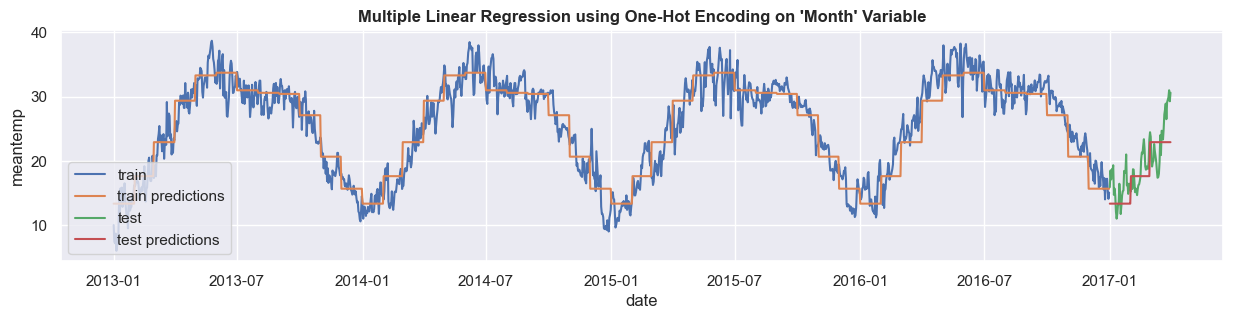

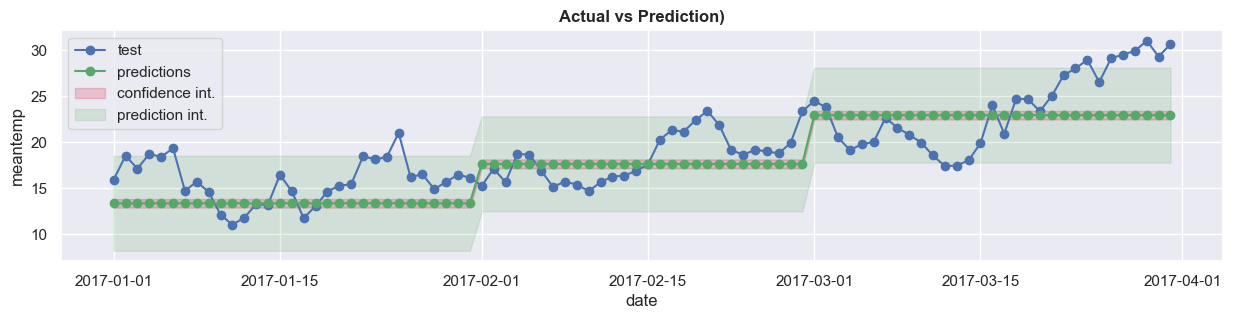

Evaluation on test set: 
R2: 0.42347626347906087
RMSE: 12.529627445971682
MAE: 2.941063619541184


In [105]:
# Identifying independent and dependent variables

# train
X_train = dummy_df_train
y_train = train_data['meantemp']

# test
X_test = dummy_df_test
y_test = test_data['meantemp']

# Linear Regression using statsmodels
X_train_c = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train_c).fit()

# printing summary result on test data
print(reg.summary())

# predictions
# train
preds_train = reg.predict(X_train_c)
# test
X_test_c = sm.add_constant(X_test)
df_predictions_test = reg.get_prediction(X_test_c).summary_frame(alpha=0.05)
preds_test = df_predictions_test['mean'].values

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Multiple Linear Regression using One-Hot Encoding on 'Month' Variable", weight="bold")
plt.plot(train_data.index, y_train, label='train')
plt.plot(train_data.index, preds_train, label='train predictions')
plt.plot(test_data.index, y_test, label='test')
plt.plot(test_data.index, preds_test, label='test predictions')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='lower left')
plt.show()

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Actual vs Prediction)", weight="bold")
plt.plot(test_data.index, y_test, 'o-' ,label='test')
plt.plot(test_data.index, preds_test, 'go-', label='predictions')
plt.fill_between(test_data.index, df_predictions_test.mean_ci_lower, df_predictions_test.mean_ci_upper, alpha=.2, color='crimson', label = 'confidence int.')
plt.fill_between(test_data.index, df_predictions_test.obs_ci_lower, df_predictions_test.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='best')
plt.show()

r2_test = r2_score(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=True)
mae = mean_absolute_error(y_test, preds_test)

print(f"=============================")
print(f"Evaluation on test set: \nR2: {r2_test}\nRMSE: {rmse}\nMAE: {mae}")

Using this method a slightly better result was achieved on the training dataset, while a **worse performance** was found on the testing dataset with an **R2** of `0.42`, a symptom that multiple linear regression is not among the best methods for making accurate forecasting on time series, as it cannot best capture its main components.

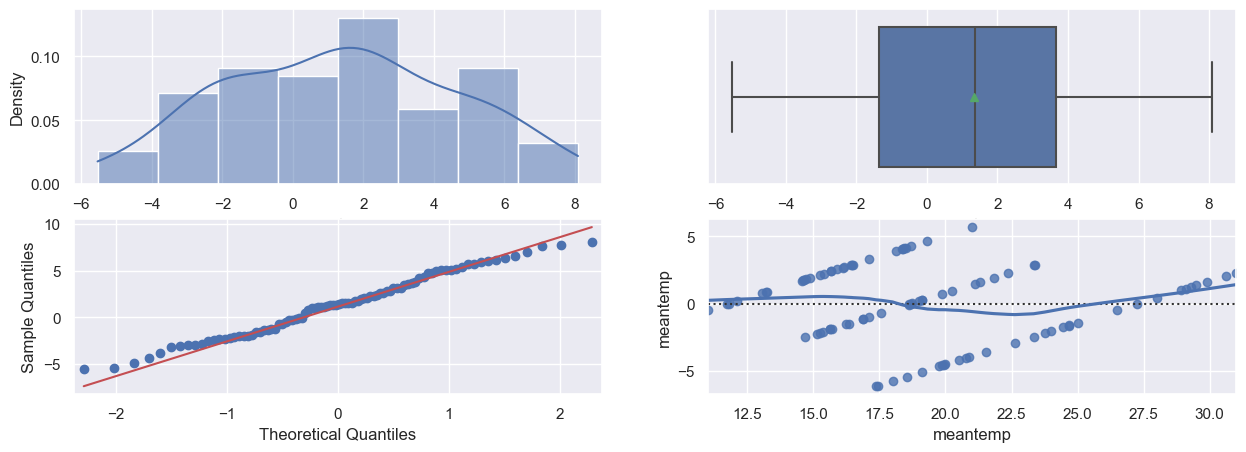

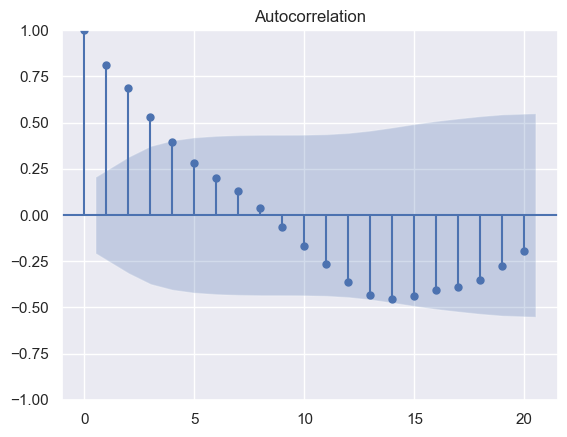

In [111]:
# Calculating residuals
residuals = y_test - preds_test

# plotting residuals visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
# histogram and boxplot to see distribution
sns.histplot(residuals, kde=True, stat='density', ax=ax[0,0])
sns.boxplot(x=residuals, ax=ax[0,1], showmeans=True)
# qq-plot 
sm.qqplot(residuals, line='q', ax=ax[1,0])
# residplot
sns.residplot(y=residuals, x=y_test, lowess=True, ax=ax[1,1])

plot_acf(residuals)

plt.show()

Analyzing the **residuals** obtained by this method we can again observe **problems** regarding **autocorrelation**. In fact, the errors do not show independence from each other.